## Observations and Insights 

In [156]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combinded_data_df = pd.merge(mouse_metadata, study_results, how = 'outer', on = 'Mouse ID')

# Display the data table for preview

combinded_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [157]:
# Checking the number of mice.

Mice_by_ID = combinded_data_df["Mouse ID"].value_counts()

Mice_Count = len(Mice_by_ID)
Mice_Count

249

In [158]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mice_dups = combinded_data_df.loc[combinded_data_df.duplicated(['Mouse ID','Timepoint',]),'Mouse ID'].unique()


In [159]:
# Optional: Get all the data for the duplicate mouse ID. 

all_mice_dups = pd.DataFrame(mice_dups)
all_mice_dups

,0
0,g989


In [160]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

combinded_no_dups = combinded_data_df[combinded_data_df["Mouse ID"].isin(all_mice_dups) == False]

In [161]:
# Checking the number of mice in the clean DataFrame.

mice_no_dups = combinded_no_dups["Mouse ID"].value_counts()
mice_number_clean = len(mice_no_dups)
mice_number_clean

249

## Summary Statistics

In [162]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

tumor_mean_by_reg = combinded_no_dups.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
tumor_median_by_reg = combinded_no_dups.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
tumor_var_by_reg = combinded_no_dups.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
tumor_std_by_reg = combinded_no_dups.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
tumor_SEM_by_reg = combinded_no_dups.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summ_stats = pd.DataFrame({"Mean": tumor_mean_by_reg,
                          "Median":tumor_median_by_reg,
                          "Variance":tumor_var_by_reg,
                          "Standard Dev":tumor_std_by_reg,
                          "SEM": tumor_SEM_by_reg})
summ_stats

,Mean,Median,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [163]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

summ_table_agg = combinded_no_dups.groupby('Drug Regimen').agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']

summ_table_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

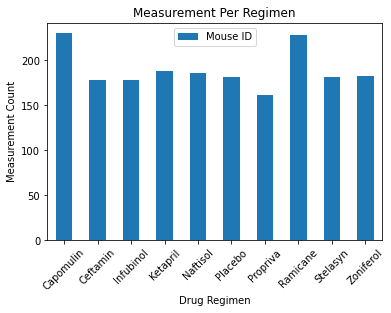

In [164]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_count_df = pd.DataFrame(combinded_no_dups.groupby('Drug Regimen').count()['Mouse ID'])

regimen_count_df.sort_values(by='Mouse ID')

regimen_count_bar = regimen_count_df.plot.bar(legend = 'best',rot = 45)
plt.ylabel("Measurement Count")
plt.title("Measurement Per Regimen")
plt.show()

Text(0, 0.5, 'Measurement Count')

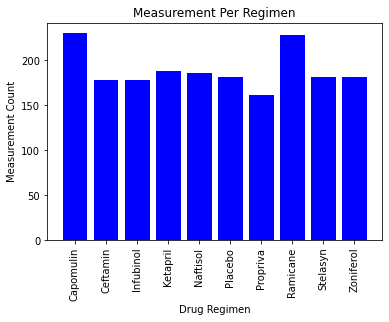

In [165]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_list = regimen_count_df.index.values.tolist()

x_axis = np.arange(len(regimen_count_df))
y_axis = regimen_count_df['Mouse ID']

tick_locations = [x for x in x_axis]

plt.bar(x_axis, y_axis, color = 'b', align = 'center')
plt.xticks(tick_locations, drug_list, rotation = 'vertical')

plt.title("Measurement Per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Measurement Count")


Text(0, 0.5, '')

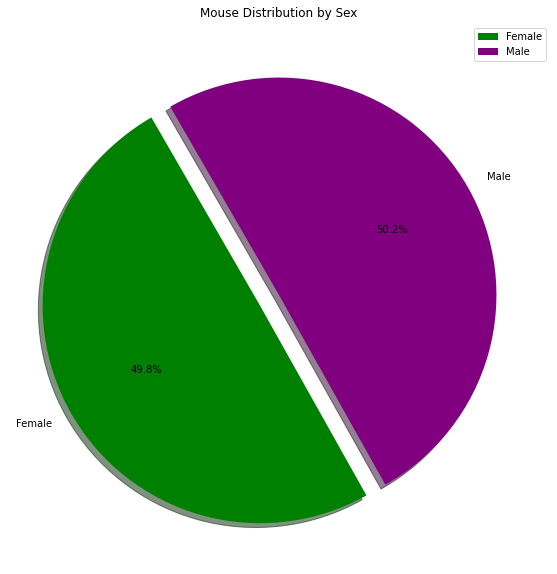

In [212]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Group by gender to get counts
gender_groups = combinded_no_dups.groupby(["Mouse ID","Sex"])

gender_groups_df = pd.DataFrame(gender_groups.size())

#create DataFrame to be plotted
gender = pd.DataFrame(gender_groups_df.groupby(['Sex']).count())
gender.columns = ['Total Mouse Count']

gender["Mouse Sex by Percent"] = gender["Mouse Sex by Percent"] = ((gender["Total Mouse Count"]/gender["Total Mouse Count"].sum())*100)

#create plot in pandas
colors = ("Green", "Purple")
explode = (.1,0)
gender_plot = gender.plot.pie(y ='Total Mouse Count',figsize = (10,10), colors = colors, startangle = 120, explode = explode, shadow = True, autopct= "%1.1f%%")

plt.title("Mouse Distribution by Sex")
plt.ylabel('')


In [213]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
